# Naive Bayes

## O conjunto de dados utilizado neste trabalho contém milhares de artigos de notícias. Este conjunto de dados foi extraído da plataforma Kaggle.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
fakenews = pd.read_csv("/content/drive/MyDrive/fake_or_real_news.csv")
fakenews

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


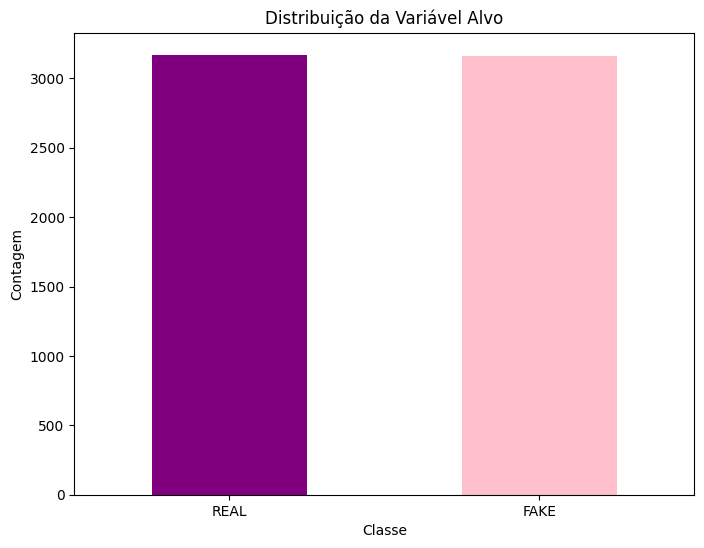

In [4]:
target_counts = fakenews['label'].value_counts()

plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['purple', 'pink'])
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

### Pré processamento

In [5]:
fakenews.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [6]:
fakenews = fakenews.drop('Unnamed: 0', axis=1)

In [7]:
label_mapping = {"FAKE": 0, "REAL": 1}

fakenews['label'] = fakenews['label'].map(label_mapping)
fakenews.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


### Separando X e y

In [8]:
X = fakenews.drop(['label'], axis=1)
y = fakenews['label']

### Lematização

In [9]:
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(len(X)):
    rev = re.sub('[^a-zA-Z]', ' ', X['text'][i])
    rev = rev.lower()
    rev = rev.split()
    rev = [lemmatizer.lemmatize(word) for word in rev if word not in stopwords.words('english')]
    rev = ' '.join(rev)
    corpus.append(rev)

### Vetorizador TF-IDF

In [10]:
tfidf_v = TfidfVectorizer(max_features=8000, ngram_range=(1, 3))

X = tfidf_v.fit_transform(corpus).toarray()
X = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())

### Dividindo os dados em conjuntos de treino e teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Treinando o modelo NB

In [12]:
modelo = MultinomialNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

### Avaliação do desempenho do modelo

In [14]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print('Acurácia do modelo:', acc)

Acurácia do modelo:  0.8795370857443451
